# Regressão linear múltipla com scikit-learn

    Neste caderno, aprendemos como usar o scikit-learn para implementar a regressão linear múltipla. 
    Fazemos o download de um conjunto de dados relacionado ao consumo de combustível e à emissão de dióxido de carbono nos carros.

# Import de pacotes importantes

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Download Data

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-02-12 10:18:46--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolvendo s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Conectando-se a s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 72629 (71K) [text/csv]
Salvando em: “FuelConsumption.csv”

FuelConsumption.csv 100%[===================>]  70,93K   162KB/s    em 0,4s    

2020-02-12 10:18:49 (162 KB/s) - “FuelConsumption.csv” salvo [72629/72629]



# Análise do Data

    Fizemos o download de um conjunto de dados de consumo de combustível, FuelConsumption.csv, que contém classificações de consumo de combustível específicas do modelo e emissões estimadas de dióxido de carbono para novos veículos comerciais leves para venda a varejo no Canadá.

In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


    Vamos selecionar alguns recursos que queremos usar para regressão.

In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


    Permite traçar valores de emissão em relação ao tamanho do motor:

Text(0, 0.5, 'Emissão')

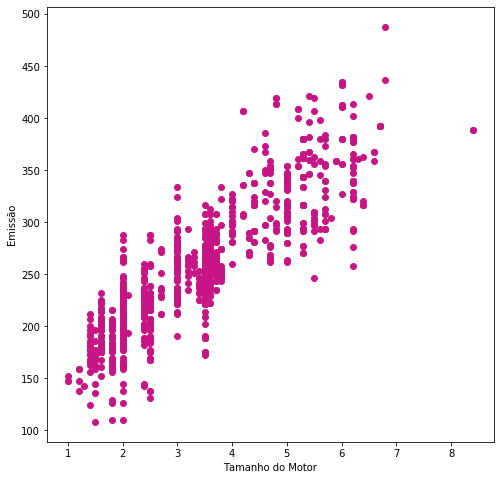

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='mediumvioletred')
plt.xlabel("Tamanho do Motor")
plt.ylabel("Emissão")

# Treino e Teste

    A divisão Train / Test envolve dividir o conjunto de dados em conjuntos de treinamento e teste, respectivamente, que são mutuamente exclusivos. Depois disso, você treina com o conjunto de treinamento e testa com o conjunto de testes. Isso fornecerá uma avaliação mais precisa da precisão fora da amostra, porque o conjunto de dados de teste não faz parte do conjunto de dados que foi usado para treinar os dados. É mais realista para problemas do mundo real.

    Isso significa que sabemos o resultado de cada ponto de dados neste conjunto de dados, o que é ótimo para testar! E como esses dados não foram usados para treinar o modelo, o modelo não tem conhecimento do resultado desses pontos de dados. Então, em essência, é realmente um teste fora da amostra.

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Text(0, 0.5, 'Emission')

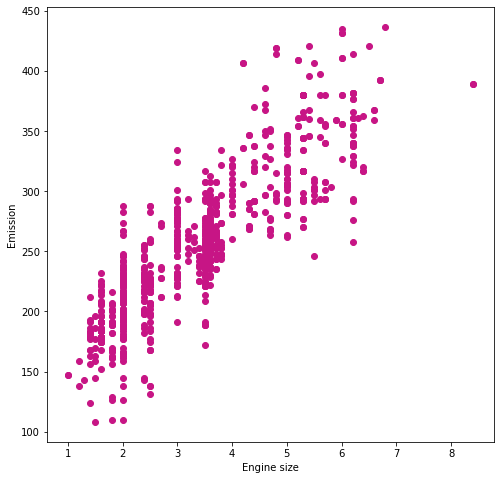

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='mediumvioletred')
plt.xlabel("Tamanho Motor")
plt.ylabel("Emissão")

# Modelo de Regressão Múltipla

    Na realidade, existem múltiplas variáveis que predizem a emissão de Co2. Quando mais de uma variável independente está presente, o processo é chamado de regressão linear múltipla. Por exemplo, prevendo a emissão de co2 usando o Consumo de Combustivel, Tamanho do Motor e Cilindros. A coisa boa aqui é que a regressão linear múltipla é a extensão do modelo de regressão linear simples.
    
    
    numpy.asanyarray() - A função é usada quando queremos converter a entrada em uma matriz, mas ela passa as subclasses ndarray . 
    As entradas podem ser escalares, listas, listas de tuplas, tuplas, tuplas de tuplas, tuplas de listas e ndarrays.

In [11]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit (x, y)

print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.27337231  7.37886914  9.70182469]]


    Como mencionado anteriormente, Coeficiente e Interceptação, são os parâmetros da linha de ajuste. Dado que é uma regressão linear múltipla, com 3 parâmetros, e sabendo que os parâmetros são a interceptação e coeficientes do hiperplano, o sklearn pode estimar esses dados a partir de nossos dados. 
    O Scikit-learn usa o método dos mínimos quadrados comuns para resolver esse problema.

    Mínimos Quadrados Ordinários (OLS)
    O OLS é um método para estimar os parâmetros desconhecidos em um modelo de regressão linear. O OLS escolhe os parâmetros de uma função linear de um conjunto de variáveis, minimizando a soma dos quadrados das diferenças entre a variável dependente do alvo e aquelas previstas pela função linear. Em outras palavras, ele tenta minimizar a soma dos erros ao quadrado (SSE) ou erro ao quadrado médio (MSE) entre a variável de destino (y) e nossa saída prevista (𝑦̂) em todas as amostras no conjunto de dados.

    O OLS pode encontrar os melhores parâmetros usando os seguintes métodos: - Resolvendo os parâmetros do modelo analiticamente usando equações de forma fechada - Usando um algoritmo de otimização (descida de gradiente, descida de gradiente estocástica, método de Newton etc.)

# Predição

In [15]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Soma residual de quadrados: %.2f"
      % np.mean((y_hat - y) ** 2))

print('Score: %.2f' % regr.score(x, y))

Soma residual de quadrados: 509.52
Score: 0.89


    numpy.mean() - Calcule a média aritmética ao longo do eixo especificado. Retorna a média dos elementos da matriz.

In [18]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Soma residual de quadrados: %.2f"
      % np.mean((y_hat - y) ** 2))

print('Score: %.2f' % regr.score(x, y))

Soma residual de quadrados: 509.52
Score: 0.84
